In [1]:
import pandas as pd #
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

In [2]:
from sklearn.datasets import load_iris
iris=load_iris()
iris

{'data': array([[5.1, 3.5, 1.4, 0.2],
        [4.9, 3. , 1.4, 0.2],
        [4.7, 3.2, 1.3, 0.2],
        [4.6, 3.1, 1.5, 0.2],
        [5. , 3.6, 1.4, 0.2],
        [5.4, 3.9, 1.7, 0.4],
        [4.6, 3.4, 1.4, 0.3],
        [5. , 3.4, 1.5, 0.2],
        [4.4, 2.9, 1.4, 0.2],
        [4.9, 3.1, 1.5, 0.1],
        [5.4, 3.7, 1.5, 0.2],
        [4.8, 3.4, 1.6, 0.2],
        [4.8, 3. , 1.4, 0.1],
        [4.3, 3. , 1.1, 0.1],
        [5.8, 4. , 1.2, 0.2],
        [5.7, 4.4, 1.5, 0.4],
        [5.4, 3.9, 1.3, 0.4],
        [5.1, 3.5, 1.4, 0.3],
        [5.7, 3.8, 1.7, 0.3],
        [5.1, 3.8, 1.5, 0.3],
        [5.4, 3.4, 1.7, 0.2],
        [5.1, 3.7, 1.5, 0.4],
        [4.6, 3.6, 1. , 0.2],
        [5.1, 3.3, 1.7, 0.5],
        [4.8, 3.4, 1.9, 0.2],
        [5. , 3. , 1.6, 0.2],
        [5. , 3.4, 1.6, 0.4],
        [5.2, 3.5, 1.5, 0.2],
        [5.2, 3.4, 1.4, 0.2],
        [4.7, 3.2, 1.6, 0.2],
        [4.8, 3.1, 1.6, 0.2],
        [5.4, 3.4, 1.5, 0.4],
        [5.2, 4.1, 1.5, 0.1],
  

In [3]:
iris.feature_names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [4]:
df=pd.DataFrame(iris.data,columns=iris.feature_names)
df.head(2)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2


In [5]:
df["class"]=iris.target
df.head(2)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),class
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
 4   class              150 non-null    int64  
dtypes: float64(4), int64(1)
memory usage: 6.0 KB


In [7]:
df.describe() # skewness-- petal length 

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),class
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333,1.000000
std,0.828066,0.435866,1.765298,0.762238,0.819232
min,4.300000,2.000000,1.000000,0.100000,0.000000
25%,5.100000,2.800000,1.600000,0.300000,0.000000
50%,5.800000,3.000000,4.350000,1.300000,1.000000
75%,6.400000,3.300000,5.100000,1.800000,2.000000
max,7.900000,4.400000,6.900000,2.500000,2.000000


In [8]:
df["class"].value_counts() # balanced dstribution of target class

class
0    50
1    50
2    50
Name: count, dtype: int64

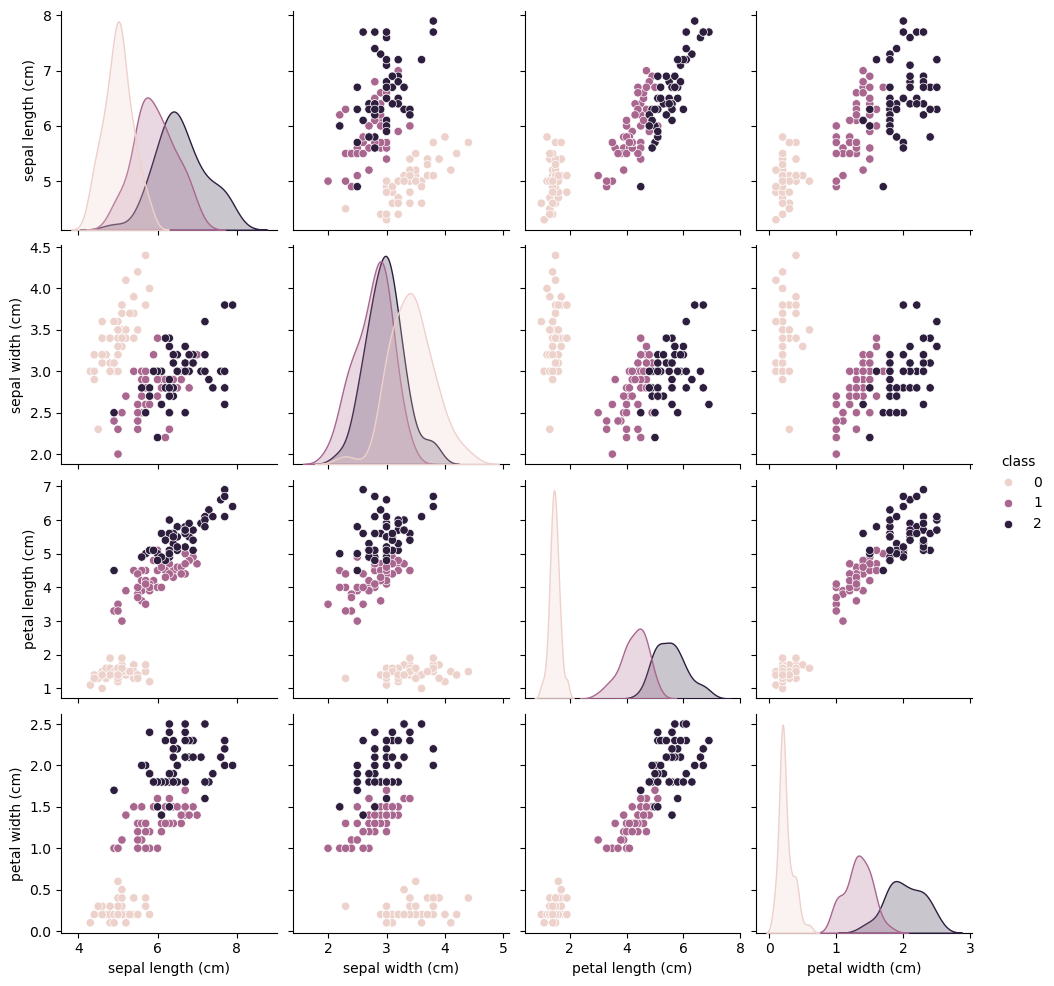

In [9]:
sns.pairplot(data=df,hue="class")

In [10]:
features=df.drop("class",axis=1)
target=df["class"]

In [11]:
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest=train_test_split(features,target,test_size=0.2,random_state=1)

In [12]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report


In [13]:
def mymodel(model):
    model.fit(xtrain,ytrain)
    ypred=model.predict(xtest)
    # overfitting-unerfitting check
    train_score=model.score(xtrain,ytrain)
    test_score=model.score(xtest,ytest)
    print("Training score : ",train_score)
    print("Testing score : ",test_score)
    c=pd.DataFrame(confusion_matrix(ytest,ypred),
                   index=["Iris Setosa","Iris Versicolour","Iris Virginica"],
                columns=["Iris Setosa","Iris Versicolour","Iris Virginica"])
    print("Confusion Matrix : \n",c)
    print("Classification Report : \n",classification_report(ytest,ypred))
    return model

In [14]:
dt=mymodel(DecisionTreeClassifier())
dt

Training score :  1.0
Testing score :  0.9666666666666667
Confusion Matrix : 
                   Iris Setosa  Iris Versicolour  Iris Virginica
Iris Setosa                11                 0               0
Iris Versicolour            0                12               1
Iris Virginica              0                 0               6
Classification Report : 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        11
           1       1.00      0.92      0.96        13
           2       0.86      1.00      0.92         6

    accuracy                           0.97        30
   macro avg       0.95      0.97      0.96        30
weighted avg       0.97      0.97      0.97        30



DecisionTreeClassifier()

In [15]:
d={"Columns":iris.feature_names,
  "Feature importance":dt.feature_importances_}
x=pd.DataFrame(d)
x

,Columns,Feature importance
0,sepal length (cm),0.012534
1,sepal width (cm),0.018801
2,petal length (cm),0.572012
3,petal width (cm),0.396653


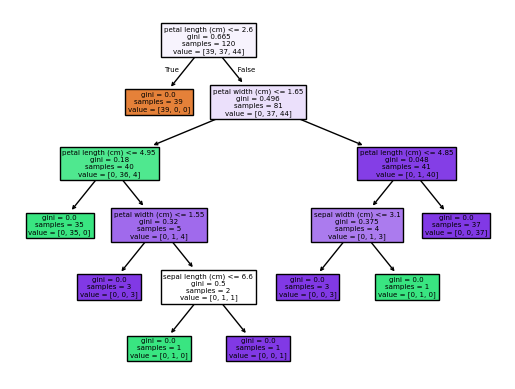

In [16]:
from sklearn import tree
tree.plot_tree(dt,feature_names=features.columns,filled=True)
plt.show()

In [17]:
dt.get_depth()

5

In [18]:
dt.get_n_leaves()

np.int64(8)

In [19]:
# to deal with overfitting apply pruning techniques 
parameters={
    "max_depth":list(range(1,4)),
    "min_samples_split":list(range(1,4))
}

In [20]:
from sklearn.model_selection import GridSearchCV
clf=GridSearchCV(DecisionTreeClassifier(),parameters,verbose=2)
clf.fit(xtrain,ytrain)

Fitting 5 folds for each of 9 candidates, totalling 45 fits
[CV] END ...................max_depth=1, min_samples_split=1; total time=   0.0s
[CV] END ...................max_depth=1, min_samples_split=1; total time=   0.0s
[CV] END ...................max_depth=1, min_samples_split=1; total time=   0.0s
[CV] END ...................max_depth=1, min_samples_split=1; total time=   0.0s
[CV] END ...................max_depth=1, min_samples_split=1; total time=   0.0s
[CV] END ...................max_depth=1, min_samples_split=2; total time=   0.0s
[CV] END ...................max_depth=1, min_samples_split=2; total time=   0.0s
[CV] END ...................max_depth=1, min_samples_split=2; total time=   0.0s
[CV] END ...................max_depth=1, min_samples_split=2; total time=   0.0s
[CV] END ...................max_depth=1, min_samples_split=2; total time=   0.0s
[CV] END ...................max_depth=1, min_samples_split=3; total time=   0.0s
[CV] END ...................max_depth=1, min_samp

GridSearchCV(estimator=DecisionTreeClassifier(),
             param_grid={'max_depth': [1, 2, 3],
                         'min_samples_split': [1, 2, 3]},
             verbose=2)

In [21]:
c=mymodel(clf.best_estimator_)
c

Training score :  0.9833333333333333
Testing score :  0.9666666666666667
Confusion Matrix : 
                   Iris Setosa  Iris Versicolour  Iris Virginica
Iris Setosa                11                 0               0
Iris Versicolour            0                12               1
Iris Virginica              0                 0               6
Classification Report : 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        11
           1       1.00      0.92      0.96        13
           2       0.86      1.00      0.92         6

    accuracy                           0.97        30
   macro avg       0.95      0.97      0.96        30
weighted avg       0.97      0.97      0.97        30



DecisionTreeClassifier(max_depth=3)

In [22]:
x["After pruning"]=c.feature_importances_
x

,Columns,Feature importance,After pruning
0,sepal length (cm),0.012534,0.000000
1,sepal width (cm),0.018801,0.000000
2,petal length (cm),0.572012,0.078912
3,petal width (cm),0.396653,0.921088


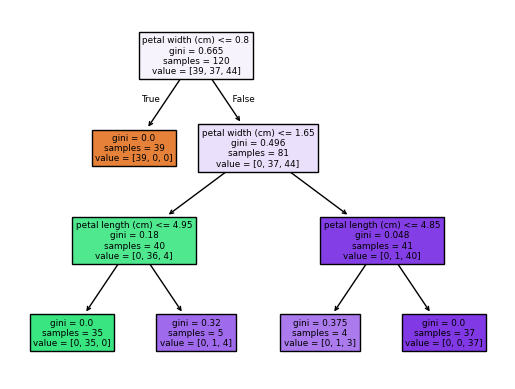

In [23]:
tree.plot_tree(c,feature_names=features.columns,filled=True)
plt.show()

In [24]:
from sklearn.svm import SVC
s=mymodel(SVC())
s

Training score :  0.975
Testing score :  0.9666666666666667
Confusion Matrix : 
                   Iris Setosa  Iris Versicolour  Iris Virginica
Iris Setosa                11                 0               0
Iris Versicolour            0                12               1
Iris Virginica              0                 0               6
Classification Report : 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        11
           1       1.00      0.92      0.96        13
           2       0.86      1.00      0.92         6

    accuracy                           0.97        30
   macro avg       0.95      0.97      0.96        30
weighted avg       0.97      0.97      0.97        30



SVC()

In [25]:
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler

In [26]:
clf = make_pipeline(StandardScaler(), SVC())
mp=mymodel(clf)
mp

Training score :  0.9666666666666667
Testing score :  0.9666666666666667
Confusion Matrix : 
                   Iris Setosa  Iris Versicolour  Iris Virginica
Iris Setosa                11                 0               0
Iris Versicolour            0                12               1
Iris Virginica              0                 0               6
Classification Report : 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        11
           1       1.00      0.92      0.96        13
           2       0.86      1.00      0.92         6

    accuracy                           0.97        30
   macro avg       0.95      0.97      0.96        30
weighted avg       0.97      0.97      0.97        30



Pipeline(steps=[('standardscaler', StandardScaler()), ('svc', SVC())])

In [27]:
parameters={
    "C":[0.01,0.001,0.1,1],
    "gamma":[0.01,0.001,0.1,1],
    "kernel":['rbf',"sigmoid","poly"]
}

In [28]:
clf=GridSearchCV(SVC(),parameters,verbose=2)
clf.fit(xtrain,ytrain)

Fitting 5 folds for each of 48 candidates, totalling 240 fits
[CV] END .....................C=0.01, gamma=0.01, kernel=rbf; total time=   0.0s
[CV] END .....................C=0.01, gamma=0.01, kernel=rbf; total time=   0.0s
[CV] END .....................C=0.01, gamma=0.01, kernel=rbf; total time=   0.0s
[CV] END .....................C=0.01, gamma=0.01, kernel=rbf; total time=   0.0s
[CV] END .....................C=0.01, gamma=0.01, kernel=rbf; total time=   0.0s
[CV] END .................C=0.01, gamma=0.01, kernel=sigmoid; total time=   0.0s
[CV] END .................C=0.01, gamma=0.01, kernel=sigmoid; total time=   0.0s
[CV] END .................C=0.01, gamma=0.01, kernel=sigmoid; total time=   0.0s
[CV] END .................C=0.01, gamma=0.01, kernel=sigmoid; total time=   0.0s
[CV] END .................C=0.01, gamma=0.01, kernel=sigmoid; total time=   0.0s
[CV] END ....................C=0.01, gamma=0.01, kernel=poly; total time=   0.0s
[CV] END ....................C=0.01, gamma=0.01

GridSearchCV(estimator=SVC(),
             param_grid={'C': [0.01, 0.001, 0.1, 1],
                         'gamma': [0.01, 0.001, 0.1, 1],
                         'kernel': ['rbf', 'sigmoid', 'poly']},
             verbose=2)

In [29]:
c_svc=mymodel(clf.best_estimator_)
c_svc

Training score :  0.975
Testing score :  0.9666666666666667
Confusion Matrix : 
                   Iris Setosa  Iris Versicolour  Iris Virginica
Iris Setosa                11                 0               0
Iris Versicolour            0                12               1
Iris Virginica              0                 0               6
Classification Report : 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        11
           1       1.00      0.92      0.96        13
           2       0.86      1.00      0.92         6

    accuracy                           0.97        30
   macro avg       0.95      0.97      0.96        30
weighted avg       0.97      0.97      0.97        30



SVC(C=0.01, gamma=0.1, kernel='poly')

In [30]:
c_svc.support_vectors_

array([[5.7, 3.8, 1.7, 0.3],
       [5.1, 3.3, 1.7, 0.5],
       [5. , 3.5, 1.6, 0.6],
       [4.8, 3.4, 1.9, 0.2],
       [4.8, 3.1, 1.6, 0.2],
       [5.4, 3.4, 1.7, 0.2],
       [5. , 3. , 1.6, 0.2],
       [6.1, 3. , 4.6, 1.4],
       [6.5, 2.8, 4.6, 1.5],
       [6.6, 2.9, 4.6, 1.3],
       [6. , 3.4, 4.5, 1.6],
       [5.7, 2.8, 4.5, 1.3],
       [5. , 2.3, 3.3, 1. ],
       [6. , 2.7, 5.1, 1.6],
       [6.3, 2.3, 4.4, 1.3],
       [5.6, 2.9, 3.6, 1.3],
       [6.9, 3.1, 4.9, 1.5],
       [6.8, 2.8, 4.8, 1.4],
       [5.9, 3.2, 4.8, 1.8],
       [5.5, 2.4, 3.7, 1. ],
       [5. , 2. , 3.5, 1. ],
       [4.9, 2.4, 3.3, 1. ],
       [5.9, 3. , 4.2, 1.5],
       [6.1, 2.9, 4.7, 1.4],
       [6.7, 3.1, 4.7, 1.5],
       [5.7, 2.9, 4.2, 1.3],
       [6.2, 2.2, 4.5, 1.5],
       [7. , 3.2, 4.7, 1.4],
       [5.7, 2.6, 3.5, 1. ],
       [6.3, 2.5, 4.9, 1.5],
       [6. , 2.2, 5. , 1.5],
       [6.2, 2.8, 4.8, 1.8],
       [5.7, 2.5, 5. , 2. ],
       [6.3, 2.7, 4.9, 1.8],
       [6.1, 3